#Twelve Data API

In [26]:
# import pandas as pd
# import requests
# import json

In [27]:
# api_key = '9439281b2cda4dd59f6398f2b4b867a0'

# symbol = 'BTC/USD'

# interval = '8h'

# order = 'asc'

# start_date = '2014-10-01'

# end_date = '2021-10-20'

In [28]:
# api_url = f'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&order={order}&symbol={symbol}&start_date={start_date}&end_date={end_date}'

# data = requests.get(api_url).json()
# data


In [29]:
# data_final = pd.DataFrame(data['values'])
# print(data_final)

#Yahoo Finance

##Data Collection and features

In [30]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
%pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import time
import re
import os

In [33]:
data = yf.download(tickers = 'BTC-USD', start = None ,end = None)

[*********************100%%**********************]  1 of 1 completed


In [34]:
data.reset_index(inplace=True)
data.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [35]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3585,2024-07-11,57729.890625,59299.433594,57120.378906,57344.914062,57344.914062,28707803842
3586,2024-07-12,57341.195312,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
3587,2024-07-13,57908.738281,59787.078125,57796.441406,59231.953125,59231.953125,17080061806
3588,2024-07-14,59225.250000,61329.527344,59225.250000,60787.792969,60787.792969,22223416061
3589,2024-07-16,64784.417969,64988.726562,62898.769531,63283.679688,63283.679688,37390553088


In [36]:
# Adding indicators
# data['SMA']=ta.sma(data['Adj Close'], length=13)
data['EMA']=ta.ema(data['Adj Close'], length=14)
data['RSI']=ta.rsi(data['Adj Close'], length=14)

# Calculate MACD and extract its components
macd = ta.macd(data['Adj Close'], fast=13, slow=26, signal=9)
data['MACD']=macd['MACD_13_26_9']         #macd line
data['MACD_SIGNAL'] = macd['MACDs_13_26_9'] #macd signal line
data['MACD_HIST'] = macd['MACDh_13_26_9']   #macd histogram

data['ATR']=ta.atr(data['High'], data['Low'], data['Adj Close'])

data['OBV']=ta.obv(data['Adj Close'], data['Volume'])

data['CCI']=ta.cci(data['High'], data['Low'], data['Adj Close'], length=14)

data[['ADX_14', 'DMP_14', 'DMN_14']] = ta.adx(data['High'], data['Low'], data['Adj Close'])


data['TargetNextClose'] = data['Adj Close'].shift(-1)

# data.dropna(inplace=True)
data.reset_index(inplace = True)
data.isna().sum()

index               0
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
EMA                13
RSI                14
MACD               25
MACD_SIGNAL        33
MACD_HIST          33
ATR                14
OBV                 0
CCI                13
ADX_14             27
DMP_14             14
DMN_14             14
TargetNextClose     1
dtype: int64

##Data preparation

In [37]:
data.drop(['index','Close','DMP_14', 'DMN_14'], axis=1, inplace=True)

In [38]:
data.dropna(inplace=True)

In [39]:
data.head()

,Date,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14,TargetNextClose
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,381.307873,48.756987,-4.139902,-9.309693,5.169792,20.387106,-18663162.0,36.918838,21.224410,386.475006
34,2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,381.996824,50.393685,-3.493462,-8.146447,4.652985,19.720984,-4474262.0,41.555209,19.402534,383.157990
35,2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,382.151646,48.858026,-3.171602,-7.151478,3.979876,18.686993,-16115562.0,21.311364,17.776621,358.416992
36,2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,378.987025,39.250383,-4.584357,-6.638054,2.053697,19.447947,-42572462.0,-109.834971,18.046700,358.345001
37,2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,376.234756,39.226211,-5.662032,-6.442850,0.780818,18.806012,-58158162.0,-157.946935,18.463084,347.270996


In [40]:
data.shape

(3556, 16)

In [41]:
data_set = data.iloc[:, 1:]
data_set.shape
data_set.head()


,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14,TargetNextClose
33,389.230988,390.084015,378.252014,382.845001,16419000,381.307873,48.756987,-4.139902,-9.309693,5.169792,20.387106,-18663162.0,36.918838,21.224410,386.475006
34,382.420990,392.645996,380.834015,386.475006,14188900,381.996824,50.393685,-3.493462,-8.146447,4.652985,19.720984,-4474262.0,41.555209,19.402534,383.157990
35,386.118011,388.575989,382.248993,383.157990,11641300,382.151646,48.858026,-3.171602,-7.151478,3.979876,18.686993,-16115562.0,21.311364,17.776621,358.416992
36,382.962006,385.048004,356.446991,358.416992,26456900,378.987025,39.250383,-4.584357,-6.638054,2.053697,19.447947,-42572462.0,-109.834971,18.046700,358.345001
37,358.591003,364.345001,353.304993,358.345001,15585700,376.234756,39.226211,-5.662032,-6.442850,0.780818,18.806012,-58158162.0,-157.946935,18.463084,347.270996


In [42]:
#Normalizing the data
data_max = data_set.max()
data_set_scaled = data_set.divide(data_max)
data_set_scaled.head()

,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14,TargetNextClose
33,0.005326,0.005289,0.005303,0.005238,0.000047,0.005510,0.517029,-0.000819,-0.001995,0.004511,0.004075,-0.000007,0.093145,0.282821,0.005288
34,0.005233,0.005324,0.005339,0.005288,0.000040,0.005520,0.534385,-0.000691,-0.001746,0.004060,0.003942,-0.000002,0.104843,0.258544,0.005243
35,0.005284,0.005269,0.005359,0.005243,0.000033,0.005522,0.518101,-0.000628,-0.001533,0.003473,0.003735,-0.000006,0.053768,0.236878,0.004904
36,0.005240,0.005221,0.004997,0.004904,0.000075,0.005476,0.416219,-0.000907,-0.001423,0.001792,0.003887,-0.000016,-0.277110,0.240477,0.004903
37,0.004907,0.004940,0.004953,0.004903,0.000044,0.005436,0.415963,-0.001121,-0.001381,0.000681,0.003759,-0.000022,-0.398495,0.246025,0.004752


In [43]:
print(data_set_scaled.values)
print(data_set_scaled.values.shape)

[[ 0.00532614  0.00528927  0.00530254 ...  0.09314508  0.2828208
   0.00528813]
 [ 0.00523295  0.00532401  0.00533874 ...  0.1048425   0.25854383
   0.00524274]
 [ 0.00528354  0.00526882  0.00535857 ...  0.05376791  0.23687811
   0.00490421]
 ...
 [ 0.78464266  0.793661    0.79331176 ... -0.10163214  0.54267855
   0.81046957]
 [ 0.79240878  0.81067147  0.81022185 ...  0.01467722  0.53433104
   0.8317581 ]
 [ 0.8104236   0.83158602  0.83025166 ...  0.17467354  0.51308001
   0.86590926]]
(3556, 15)


In [44]:
# multiple feature from data provided to the model
features = data_set_scaled.iloc[:, :-1]  # All columns except the last one
target = data_set_scaled.iloc[:, -1]  # Last column

values = features.values
X = []

backcandles = 30
for j in range(features.shape[1]): # iterate over columns
    X.append([])
    for i in range(backcandles, features.shape[0]):
        X[j].append(values[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
# Choose -1 for last column
X, y =np.array(X), np.array(target[backcandles:])
    
# print(X)
print(X)
# print(y)
print(y.shape)

[[[ 5.32614007e-03  5.28926974e-03  5.30254180e-03 ... -6.94544085e-06
    9.31450801e-02  2.82820795e-01]
  [ 5.23295376e-03  5.32400843e-03  5.33873769e-03 ... -1.66508344e-06
    1.04842500e-01  2.58543829e-01]
  [ 5.28354288e-03  5.26882194e-03  5.35857362e-03 ... -5.99735900e-06
    5.37679095e-02  2.36878113e-01]
  ...
  [ 5.12771231e-03  5.29896459e-03  5.25137378e-03 ...  1.49123346e-06
    1.23802369e-01  3.99287035e-01]
  [ 5.31407116e-03  5.56201511e-03  5.29202790e-03 ... -1.39598659e-05
    1.45307037e-01  4.09237001e-01]
  [ 5.30635359e-03  5.32070012e-03  5.20251937e-03 ... -2.59513745e-05
    4.03129898e-02  4.12927652e-01]]

 [[ 5.23295376e-03  5.32400843e-03  5.33873769e-03 ... -1.66508344e-06
    1.04842500e-01  2.58543829e-01]
  [ 5.28354288e-03  5.26882194e-03  5.35857362e-03 ... -5.99735900e-06
    5.37679095e-02  2.36878113e-01]
  [ 5.24035688e-03  5.22098491e-03  4.99686717e-03 ... -1.58432165e-05
   -2.77110217e-01  2.40476993e-01]
  ...
  [ 5.31407116e-03  5.5

In [45]:
# split data into train test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}' )
print(f'y_test shape: {y_test.shape}' )

X_train shape: (2468, 30, 14)
X_test shape: (1058, 30, 14)
y_train shape: (2468,)
y_test shape: (1058,)


In [46]:
X_train[0]

array([[ 0.02828473,  0.02873326,  0.02856278,  0.0279297 ,  0.00327056,
         0.02650263,  0.81252635,  0.03048776,  0.02925181,  0.01531909,
         0.01797738,  0.00802941,  0.44405969,  0.76154473],
       [ 0.0279585 ,  0.03123929,  0.0282876 ,  0.02973859,  0.0055339 ,
         0.0271561 ,  0.85335442,  0.0326591 ,  0.03047445,  0.01991486,
         0.02077688,  0.0087522 ,  0.44742362,  0.77512379],
       [ 0.02998876,  0.03146872,  0.03053939,  0.03175026,  0.00392842,
         0.02800569,  0.88746944,  0.0360381 ,  0.03218436,  0.02785159,
         0.02139751,  0.0092653 ,  0.43153484,  0.78833674],
       [ 0.03176505,  0.0342199 ,  0.03254222,  0.03343627,  0.00491606,
         0.02897938,  0.90985874,  0.04001582,  0.03441374,  0.03631303,
         0.02277159,  0.00990739,  0.44850439,  0.80653202],
       [ 0.03347374,  0.037474  ,  0.03203658,  0.03153899,  0.00685732,
         0.02955611,  0.78647527,  0.04086179,  0.03638045,  0.03203464,
         0.02797522,  0.00

##Model training and testing

In [47]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, X_train.shape[2]), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs2 = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs2)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=100, shuffle=True, validation_split = 0.2)

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0073 - val_loss: 5.3347e-04
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4727e-04 - val_loss: 2.9702e-04
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9170e-04 - val_loss: 7.6834e-04
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9968e-04 - val_loss: 4.8437e-04
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7323e-04 - val_loss: 3.6968e-04
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4401e-04 - val_loss: 2.4659e-04
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2326e-04 - val_loss: 2.6127e-04
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0891e-04 - val_loss: 2.8060e-04
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3614e-04 - val_loss: 2.6791e-04
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2453e-04 - val_loss: 2.2994e-04
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

In [48]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[0.01109901] 0.0033803800180855843
[0.84899855] 0.8424991832971874
[0.9800658] 0.9576420934615885
[0.01559455] 0.01038127637848531
[0.00918213] 0.0031512448207118185
[0.4049149] 0.41491886207215034
[0.63456655] 0.635657276864819
[0.0818484] 0.0727186197979024
[0.00627414] 0.003352630938225839
[0.11283551] 0.10019405510905334


In [49]:
print('model loss: ', model.evaluate(X_test, y_test))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0329e-04
model loss:  0.00041203718865290284


In [50]:
def save_plt_as_png(plt, file_name):
    
    # define the plot directory
    folder_path = 'plots'
    
    # check if the directory exists, if not create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # get the current time
    timestamp_str = str(int(time.time()))
    title_lowercase = re.sub(r'[^\w\s]', '', file_name.lower())
    file_name = re.sub(r'\s+', '_', title_lowercase.strip())


    file_name_timestamped = f'{timestamp_str}_{file_name}.png'
    full_path = f'{folder_path}/{file_name_timestamped}'    
    plt.savefig(full_path, dpi=300)

    print(f'Plot saved as {full_path}')

Plot saved as plots/1721115718_actual_vs_predicted_btc_price.png


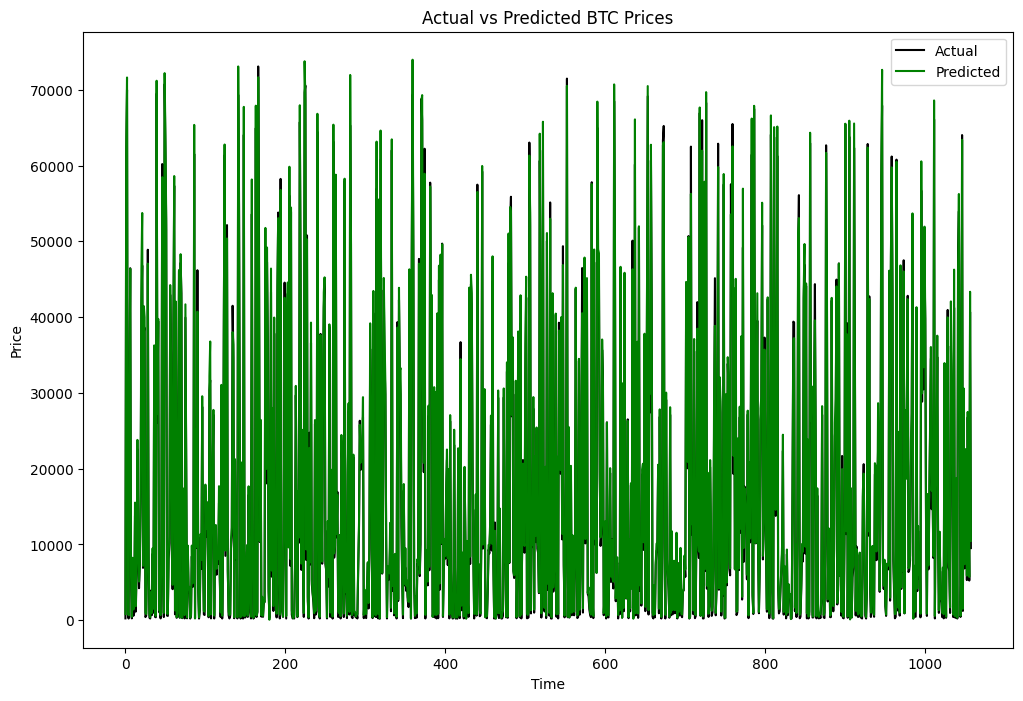

In [55]:
# Denormalize the data
target_max = data_max['TargetNextClose']
y_test_denorm = y_test * target_max
y_pred_denorm = y_pred * target_max


# Plotting actual vs predicted prices
plt.figure(figsize=(12, 8))
plt.plot(y_test_denorm, color='black', label='Actual')
plt.plot(y_pred_denorm, color='green', label='Predicted')
plt.legend()
plt.title('Actual vs Predicted BTC Prices')
plt.xlabel('Time')
plt.ylabel('Price')

save_plt_as_png(plt, 'actual_vs_predicted_btc_price')

plt.show()



In [94]:
print(y_pred.flatten().shape)
print(y_test.shape)

y_pred_flat = y_pred.flatten()

(1058,)
(1058,)


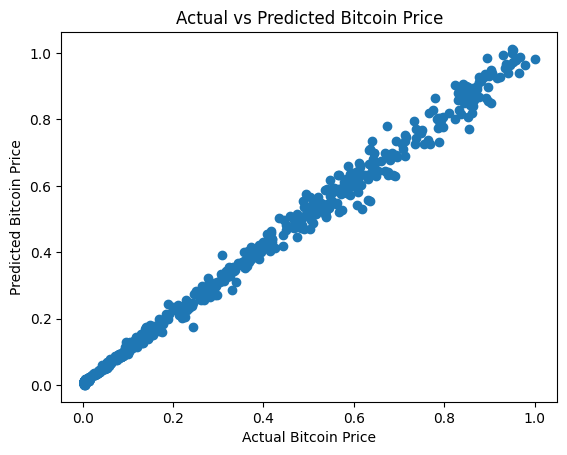

In [95]:
plt.scatter(y_test, y_pred_flat)
plt.xlabel('Actual Bitcoin Price')
plt.ylabel('Predicted Bitcoin Price')
plt.title('Actual vs Predicted Bitcoin Price')
plt.show()

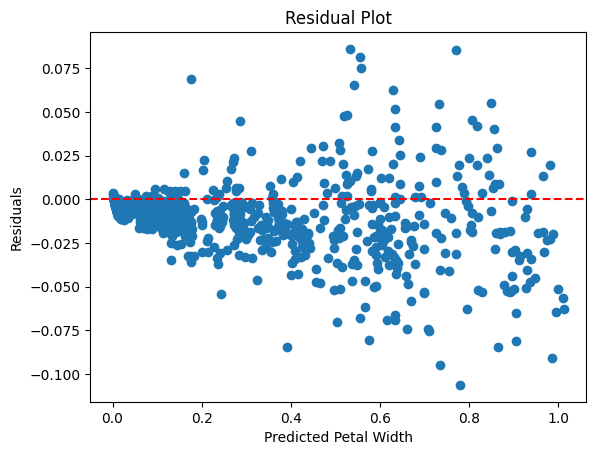

In [96]:
residuals = y_test - y_pred_flat
plt.scatter(y_pred_flat, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Plot saved as plots/1721130445_residuals_plot_btc_price_prediction.png


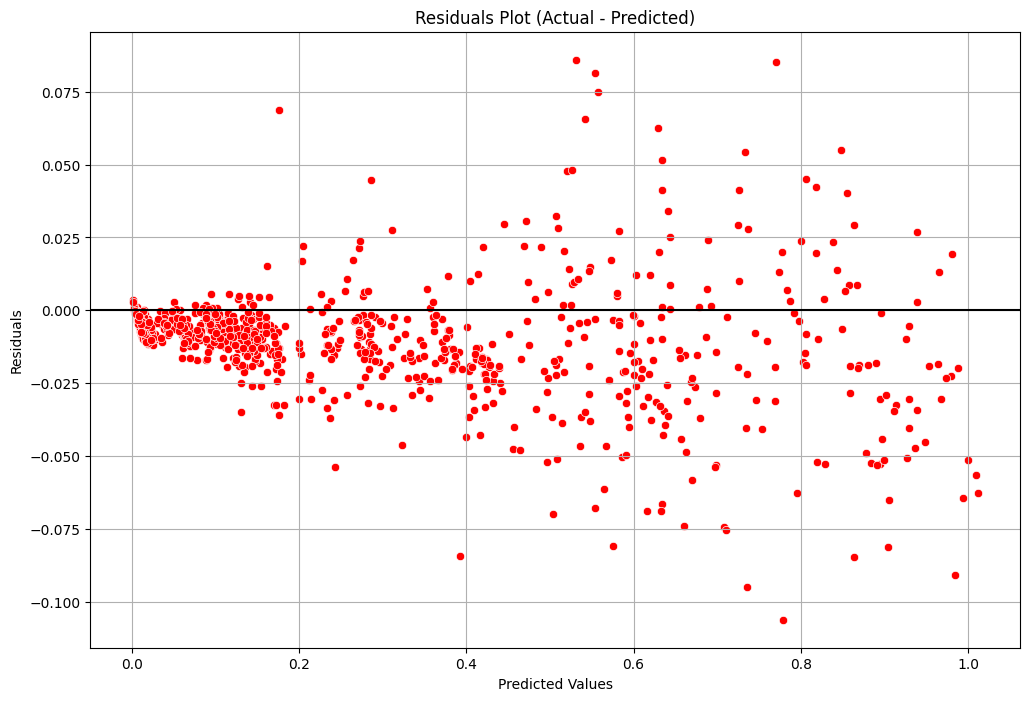

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_flat


# Residual plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y_pred_flat, y=residuals, ax=ax, color='red', )
ax.axhline(y=0, color='black', linestyle='-')
ax.set_title('Residuals Plot (Actual - Predicted)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
save_plt_as_png(plt, 'residuals_plot_btc_price_prediction')
plt.grid()
plt.show()


In [110]:
test_dates = data.iloc[backcandles + len(X_train):].index
test_dates

Index([2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540,
       ...
       3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588],
      dtype='int64', length=1058)

Plot saved as plots/1721131657_actual_vs_predicted_values_over_time.png


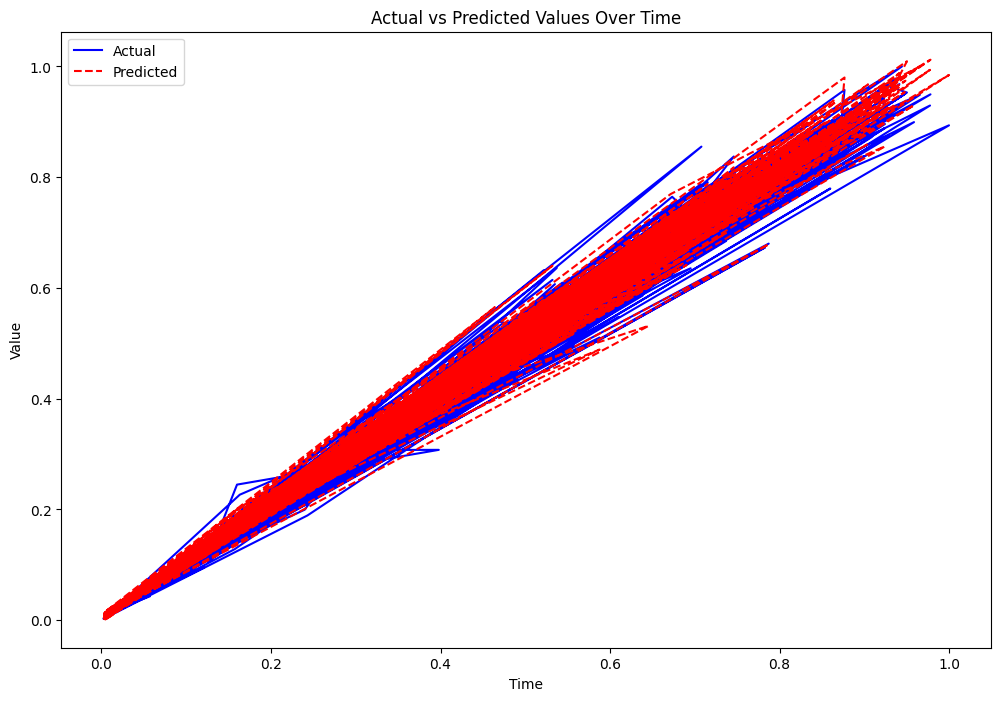

In [109]:
# Plot actual vs predicted values over time
plt.figure(figsize=(12, 8))
plt.plot(test_dates, y_test, label='Actual', color='blue')
plt.plot(test_dates, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
save_plt_as_png(plt, 'actual_vs_predicted_values_over_time')
plt.show()
